<a href="https://colab.research.google.com/github/tarupathak30/Deep-Learning-/blob/main/cnn/padding_and_strides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Input
from keras import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


original shape of x_train is (60000, 28, 28)

means number of images in the dataset is 60000

28x28 is size of each image

we have [
  image_1 (28x28),
  image_2 (28x28),
  ...
  image_60000 (28x28)
]

keras convolution layers expect a 4D input with shape

(batch_size, height, width, channels)
batch_size = 60000
height = 28, width = 28
channels = 1(because grayscale images have only 1 channel)

so what .reshape(-1, 28, 28, 1) do ?

-1 means "figure this out based on the other dimensions".

Since the original first dimension is 6000, NumPy fills this in automatically.


28, 28 stays the same

1, as we are explicitly adding the channel dimension

convolution layers like Conv2D need this structure to know how to slide the filters over the image

without the channel dimension, Keras wouldn't know how to interpret each pixel.

Shape of x_train :  (60000, 28, 28, 1)


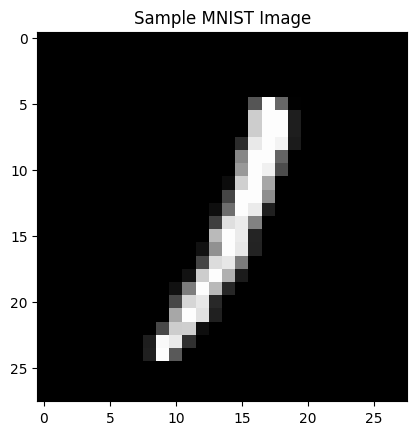

In [ ]:
# reshape to add channel dimension and normalize
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

print("Shape of x_train : ", x_train.shape)

# let's visualize a sample image
plt.imshow(x_train[99].reshape(28, 28), cmap='gray')
plt.title('Sample MNIST Image')
plt.show()

padding='same' means padding is applied such that the output size is same as the input size

In [ ]:
# function to build models with padding and strides

def build_model(padding_type='same', stride_value=1):
  model = Sequential()
  model.add(Input(shape=(28, 28, 1)))
  model.add(Conv2D(filters=8, kernel_size=(3, 3),
                   strides=(stride_value, stride_value),
                   padding=padding_type, activation='relu'))
  model.add(Conv2D(filters=8, kernel_size=(3, 3),
                   strides=(stride_value, stride_value),
                   padding=padding_type, activation='relu'))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model


In [ ]:
# experimenting with different paddings and strides
configs = [
    {'padding' : 'valid', 'stride' : 1},
    {'padding' : 'same', 'stride' : 1},
    {'padding' : 'valid', 'stride' : 2},
    {'padding' : 'same', 'stride' : 2}
]

In [ ]:
for config in configs:
  print(f"\n Model with padding= {config['padding']}, stride={config['stride']}")
  model = build_model(padding_type=config['padding'], stride_value=config['stride'])
  model.summary()

  history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

  # evaluate on test set
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print(f"Test Accuracy : {test_acc:.4f}")
  print(f"Test Loss : {test_loss:.4f}")


 Model with padding= valid, stride=1


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        46,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,754 (182.63 KB)

 Trainable params: 46,754 (182.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8821 - loss: 0.4087 - val_accuracy: 0.9771 - val_loss: 0.0770
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9761 - loss: 0.0783 - val_accuracy: 0.9787 - val_loss: 0.0640
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9827 - loss: 0.0562 - val_accuracy: 0.9782 - val_loss: 0.0706
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9862 - loss: 0.0427 - val_accuracy: 0.9817 - val_loss: 0.0565
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9892 - loss: 0.0351 - val_accuracy: 0.9841 - val_loss: 0.0536
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9800 - loss: 0.0638
Test Accuracy : 0.9841
Test Loss : 0.0536

 Model with padding= same, stride=1


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        62,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,394 (247.63 KB)

 Trainable params: 63,394 (247.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.8987 - loss: 0.3443 - val_accuracy: 0.9744 - val_loss: 0.0809
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9765 - loss: 0.0797 - val_accuracy: 0.9772 - val_loss: 0.0764
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9839 - loss: 0.0542 - val_accuracy: 0.9814 - val_loss: 0.0593
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9866 - loss: 0.0424 - val_accuracy: 0.9808 - val_loss: 0.0600
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9892 - loss: 0.0333 - val_accuracy: 0.9840 - val_loss: 0.0556
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9811 - loss: 0.0673
Test Accuracy : 0.9840
Test Loss : 0.0556

 Model with padding= valid, stride=2


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,554 (13.88 KB)

 Trainable params: 3,554 (13.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7840 - loss: 0.7126 - val_accuracy: 0.9287 - val_loss: 0.2432
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9353 - loss: 0.2227 - val_accuracy: 0.9545 - val_loss: 0.1494
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9591 - loss: 0.1434 - val_accuracy: 0.9699 - val_loss: 0.0989
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9657 - loss: 0.1158 - val_accuracy: 0.9730 - val_loss: 0.0861
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9703 - loss: 0.0963 - val_accuracy: 0.9731 - val_loss: 0.0801
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9680 - loss: 0.0943
Test Accuracy : 0.9731
Test Loss : 0.0801

 Model with padding= same, stride=2


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         3,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,594 (17.95 KB)

 Trainable params: 4,594 (17.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8034 - loss: 0.6435 - val_accuracy: 0.9559 - val_loss: 0.1532
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9520 - loss: 0.1616 - val_accuracy: 0.9671 - val_loss: 0.1052
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9656 - loss: 0.1162 - val_accuracy: 0.9732 - val_loss: 0.0879
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9721 - loss: 0.0957 - val_accuracy: 0.9759 - val_loss: 0.0799
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9738 - loss: 0.0837 - val_accuracy: 0.9772 - val_loss: 0.0723
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9715 - loss: 0.0886
Test Accuracy : 0.9772
Test Loss : 0.0723
